<a href="https://colab.research.google.com/github/Shashikumar-ezhilarasu/Tableau-social-media-analysis/blob/main/datascience_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the name of your uploaded file
df = pd.read_csv('/content/Prompt 7.csv')


In [ ]:
# Display the first few rows of the dataframe
print(df.head())

# Display summary of the dataframe
print(df.info())

# Display basic statistics
print(df.describe(include='all'))


   Unnamed: 0  Page total likes    Type  Category  Post Month  Post Weekday  \
0           0            139441   Photo         2          12             4   
1           1            139441  Status         2          12             3   
2           2            139441   Photo         3          12             3   
3           3            139441   Photo         2          12             2   
4           4            139441   Photo         2          12             2   

   Post Hour  Paid  Lifetime Post Total Reach  \
0          3   0.0                       2752   
1         10   0.0                      10460   
2          3   0.0                       2413   
3         10   1.0                      50128   
4          3   0.0                       7244   

   Lifetime Post Total Impressions  Lifetime Engaged Users  \
0                             5091                     178   
1                            19057                    1457   
2                             4373          

In [ ]:
# Display missing values per column
print(df.isnull().sum())

# Drop rows with missing values (if appropriate)
df = df.dropna()

# Alternatively, fill missing values with a specific value
df = df.fillna({
    'Page total likes': 0,
    'Lifetime Post Total Reach': 0,
    'Lifetime Post Total Impressions': 0,
    # Add other columns as needed
})


Unnamed: 0                                                             0
Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked 

In [ ]:
# Find duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

# Remove duplicate rows
df = df.drop_duplicates()


Empty DataFrame
Columns: [Unnamed: 0, Page total likes, Type, Category, Post Month, Post Weekday, Post Hour, Paid, Lifetime Post Total Reach, Lifetime Post Total Impressions, Lifetime Engaged Users, Lifetime Post Consumers, Lifetime Post Consumptions, Lifetime Post Impressions by people who have liked your Page, Lifetime Post reach by people who like your Page, Lifetime People who have liked your Page and engaged with your post, comment, like, share, Total Interactions]
Index: []


In [ ]:
# Convert `Post Month` to a datetime format if it's not already
df['Post Month'] = pd.to_datetime(df['Post Month'], format='%Y-%m', errors='coerce')

# Convert categorical columns to categorical data types
df['Type'] = df['Type'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Post Weekday'] = df['Post Weekday'].astype('category')


In [ ]:
# Example: Z-score method for outlier detection
from scipy import stats

df['z_score_total_interactions'] = stats.zscore(df['Total Interactions'])
df = df[df['z_score_total_interactions'].abs() <= 3]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Total Interactions']] = scaler.fit_transform(
    df[['Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Total Interactions']]
)


In [ ]:
# Example: Calculate engagement rate
df['engagement_rate'] = df['Lifetime Engaged Users'] / df['Lifetime Post Total Reach']


In [ ]:
df.to_csv('cleaned_data.csv', index=False)


In [ ]:
# Display missing values
print(df.isnull().sum())


Unnamed: 0                                                             0
Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked 

In [ ]:
# Drop rows with missing values
df = df.dropna()

# Alternatively, fill missing values with a specific value (e.g., 0 or 'unknown')
df = df.fillna('unknown')


In [ ]:
# Find duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

# Remove duplicate rows
df = df.drop_duplicates()


Empty DataFrame
Columns: [Unnamed: 0, Page total likes, Type, Category, Post Month, Post Weekday, Post Hour, Paid, Lifetime Post Total Reach, Lifetime Post Total Impressions, Lifetime Engaged Users, Lifetime Post Consumers, Lifetime Post Consumptions, Lifetime Post Impressions by people who have liked your Page, Lifetime Post reach by people who like your Page, Lifetime People who have liked your Page and engaged with your post, comment, like, share, Total Interactions]
Index: []


In [ ]:
# Step 1: Upload the Dataset
from google.colab import files
uploaded = files.upload()

# Step 2: Load the Dataset
import pandas as pd

# Replace 'your_file.csv' with the name of your uploaded file
df = pd.read_csv('/content/cleaned_data.csv')

# Step 3: Remove Rows with Missing Values and Duplicates
# Remove rows with missing values
df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display information and the first few rows of the cleaned dataset
print(df_cleaned.info())
print(df_cleaned.head())

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('cleaned_data.csv')

# Ensure 'Post Month' is in datetime format
df['Post Month'] = pd.to_datetime(df['Post Month'], format='%Y-%m')

# Aggregate data by month
monthly_interactions = df.groupby(df['Post Month'].dt.to_period('M')).sum()['Total Interactions']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_interactions.index.to_timestamp(), monthly_interactions, marker='o')
plt.title('Total Interactions Over Time')
plt.xlabel('Month')
plt.ylabel('Total Interactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: datetime64 type does not support sum operations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('cleaned_data.csv')

# Ensure 'Post Month' is in datetime format
df['Post Month'] = pd.to_datetime(df['Post Month'], format='%Y-%m')

# Convert 'Post Month' to period format for grouping
df['Post Month Period'] = df['Post Month'].dt.to_period('M')

# Aggregate data by period
monthly_interactions = df.groupby('Post Month Period').sum()['Total Interactions']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_interactions.index.to_timestamp(), monthly_interactions, marker='o')
plt.title('Total Interactions Over Time')
plt.xlabel('Month')
plt.ylabel('Total Interactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: datetime64 type does not support sum operations

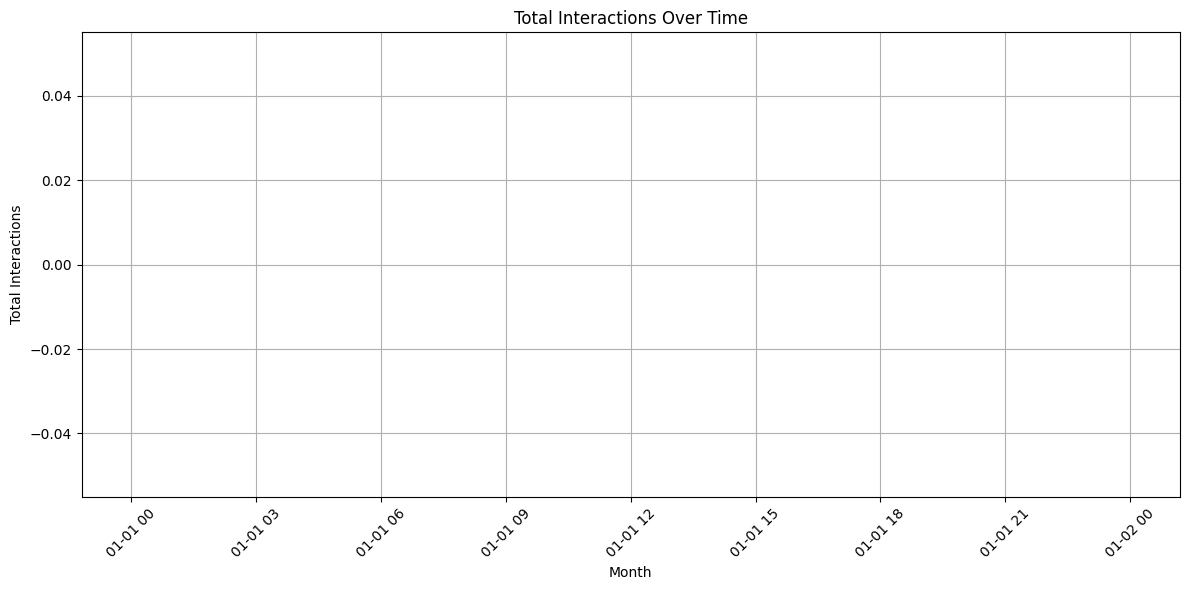

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('cleaned_data.csv')

# Ensure 'Post Month' is in datetime format
df['Post Month'] = pd.to_datetime(df['Post Month'], format='%Y-%m')

# Convert 'Post Month' to period format for grouping
df['Post Month Period'] = df['Post Month'].dt.to_period('M')

# Aggregate data by period
monthly_interactions = df.groupby('Post Month Period').agg({'Total Interactions': 'sum'})

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_interactions.index.to_timestamp(), monthly_interactions['Total Interactions'], marker='o')
plt.title('Total Interactions Over Time')
plt.xlabel('Month')
plt.ylabel('Total Interactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-19-f8c35491ac70>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_type.index, y=engagement_by_type['Lifetime Engaged Users'], palette='viridis')


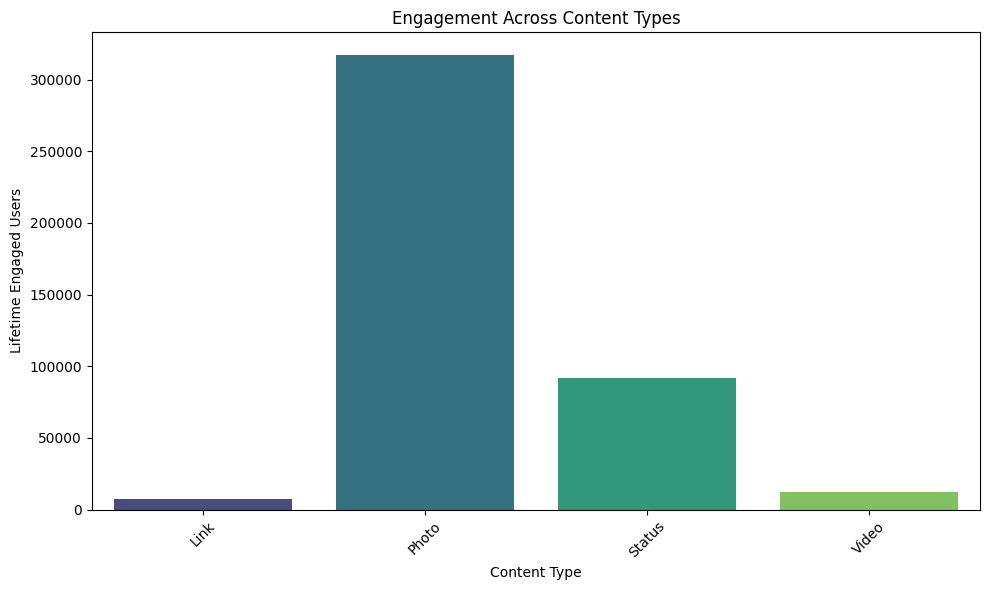

In [ ]:
import seaborn as sns

# Aggregate data by content type
engagement_by_type = df.groupby('Type').agg({'Lifetime Engaged Users': 'sum'})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_by_type.index, y=engagement_by_type['Lifetime Engaged Users'], palette='viridis')
plt.title('Engagement Across Content Types')
plt.xlabel('Content Type')
plt.ylabel('Lifetime Engaged Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-20-dae8d4b670bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reach_by_paid.index, y=reach_by_paid['Lifetime Post Total Reach'], palette='coolwarm')


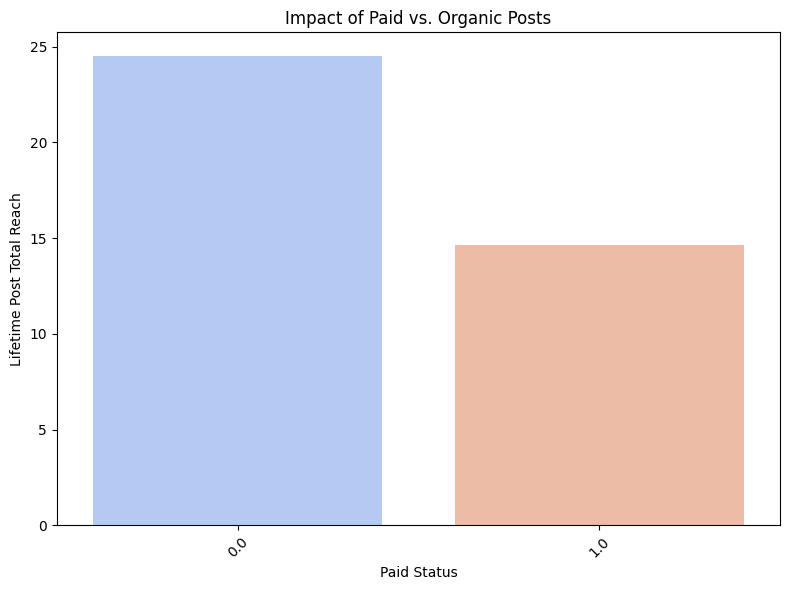

In [ ]:
# Aggregate data by paid status
reach_by_paid = df.groupby('Paid').agg({'Lifetime Post Total Reach': 'sum'})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=reach_by_paid.index, y=reach_by_paid['Lifetime Post Total Reach'], palette='coolwarm')
plt.title('Impact of Paid vs. Organic Posts')
plt.xlabel('Paid Status')
plt.ylabel('Lifetime Post Total Reach')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


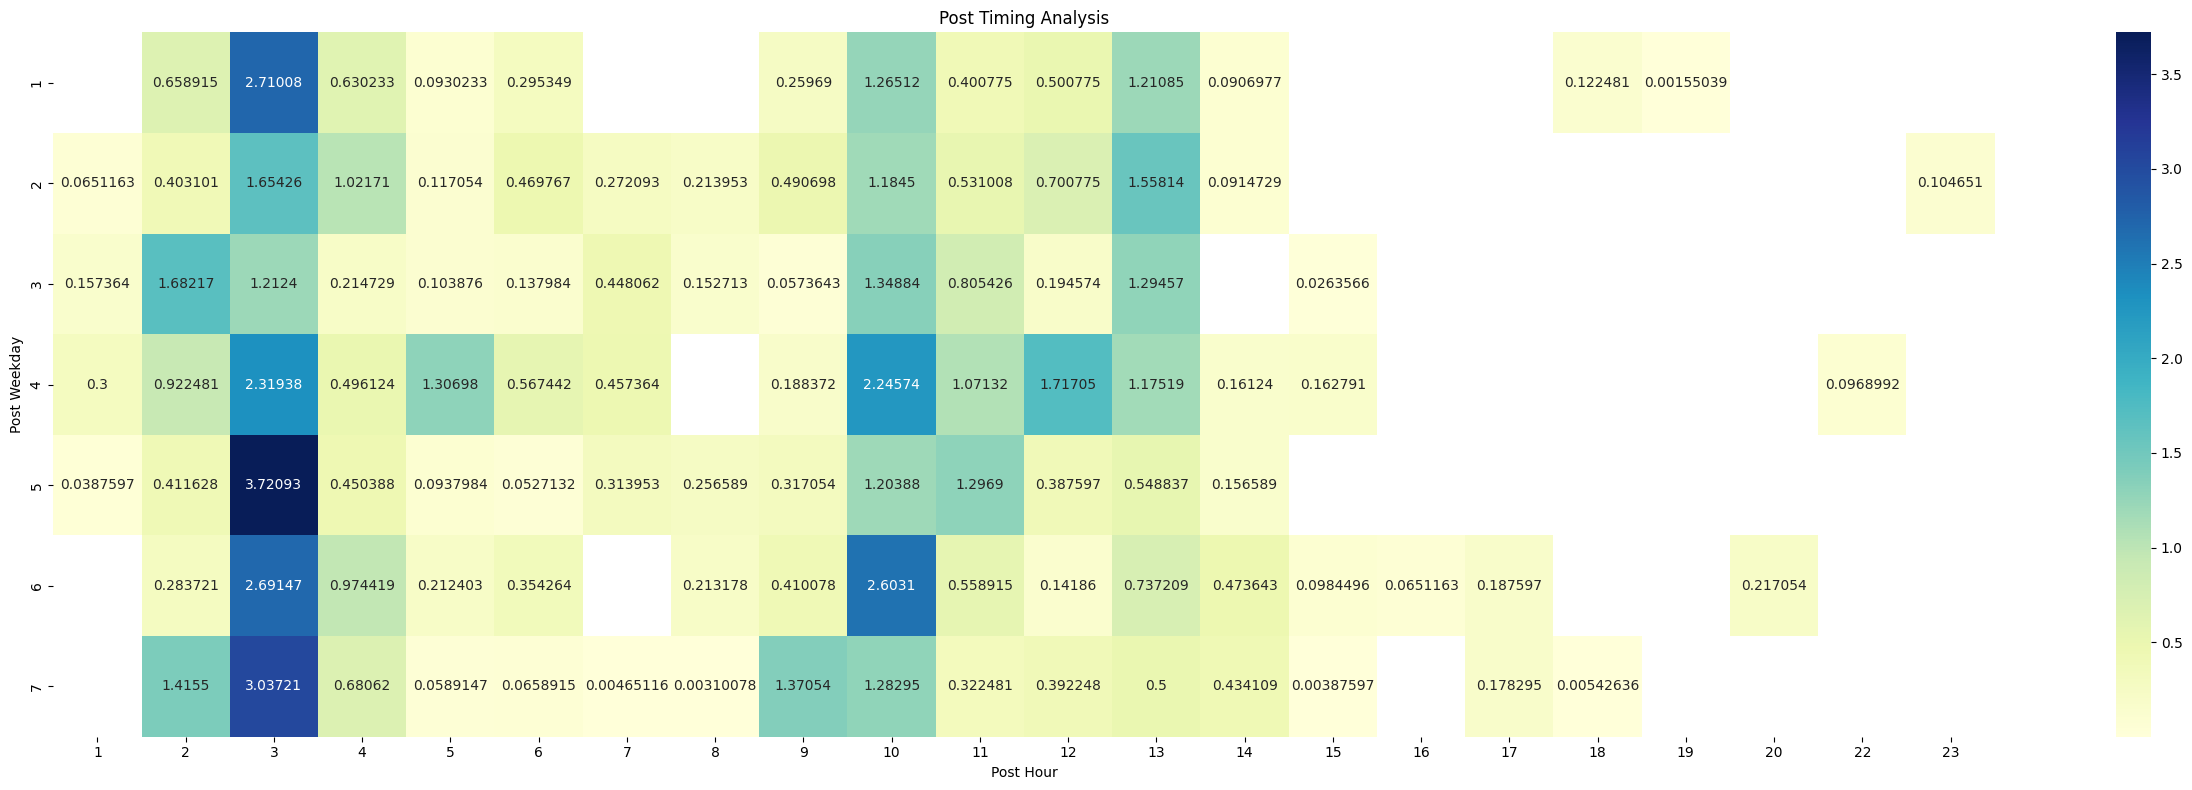

In [ ]:
# Pivot the data for heatmap
heatmap_data = df.pivot_table(index='Post Weekday', columns='Post Hour', values='Total Interactions', aggfunc='sum')

# Plot
plt.figure(figsize=(25, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Post Timing Analysis')
plt.xlabel('Post Hour')
plt.ylabel('Post Weekday')
plt.tight_layout()
plt.show()


In [ ]:
# Sort posts by total interactions
top_posts = df[['Post ID', 'Total Interactions']].sort_values(by='Total Interactions', ascending=False).head(10)

# Display as a table
fig, ax = plt.subplots(figsize=(12, 6)) # set size frame
ax.axis('tight')
ax.axis('off')
table_data = top_posts.values
table_columns = top_posts.columns
table = plt.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center', colColours=['lightgrey']*len(table_columns))
plt.title('Top-Performing Posts')
plt.show()


KeyError: "['Post ID'] not in index"

In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'Page total likes', 'Type', 'Category', 'Post Month',
       'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions',
       'z_score_total_interactions', 'engagement_rate', 'Post Month Period'],
      dtype='object')


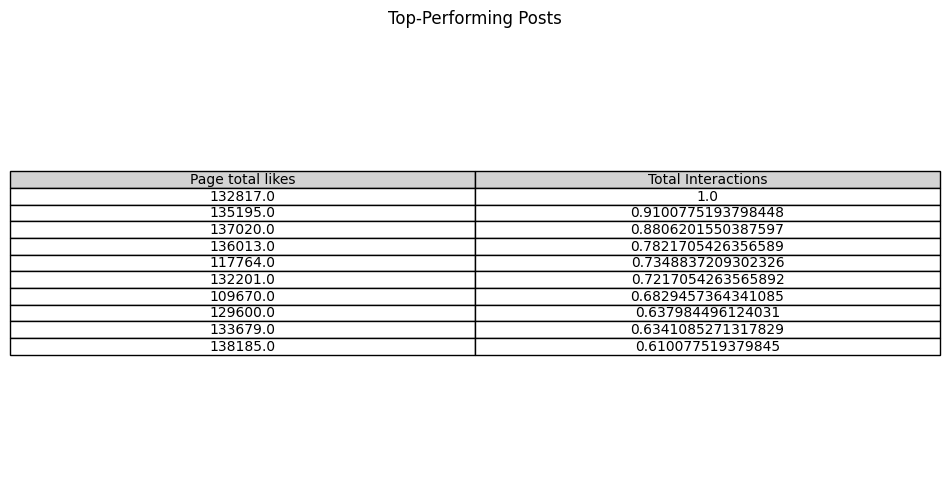

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('cleaned_data.csv')

# Sort posts by total interactions
top_posts = df[['Page total likes', 'Total Interactions']].sort_values(by='Total Interactions', ascending=False).head(10)

# Display as a table
fig, ax = plt.subplots(figsize=(12, 6))  # Set size frame
ax.axis('tight')
ax.axis('off')
table_data = top_posts.values
table_columns = top_posts.columns
table = plt.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center', colColours=['lightgrey']*len(table_columns))
plt.title('Top-Performing Posts')
plt.show()


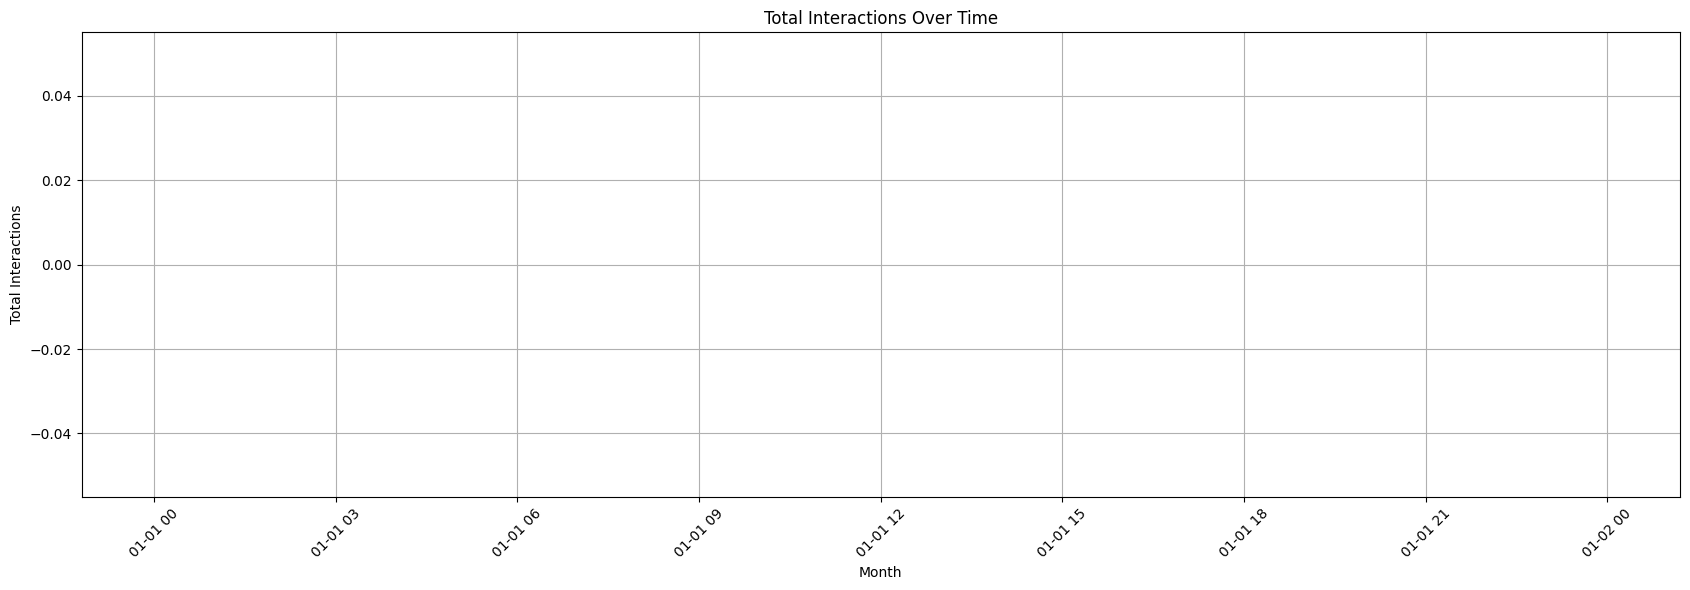

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('cleaned_data.csv')

# Ensure 'Post Month' is in datetime format
df['Post Month'] = pd.to_datetime(df['Post Month'], format='%Y-%m')

# Convert 'Post Month' to period format for grouping
df['Post Month Period'] = df['Post Month'].dt.to_period('M')

# Aggregate data by period
monthly_interactions = df.groupby('Post Month Period').agg({'Total Interactions': 'sum'})

# Plot
plt.figure(figsize=(17, 6))
plt.plot(monthly_interactions.index.to_timestamp(), monthly_interactions['Total Interactions'], marker='o')
plt.title('Total Interactions Over Time')
plt.xlabel('Month')
plt.ylabel('Total Interactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-39-b3d47305216e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_type.index, y=engagement_by_type['Lifetime Engaged Users'], palette='viridis')


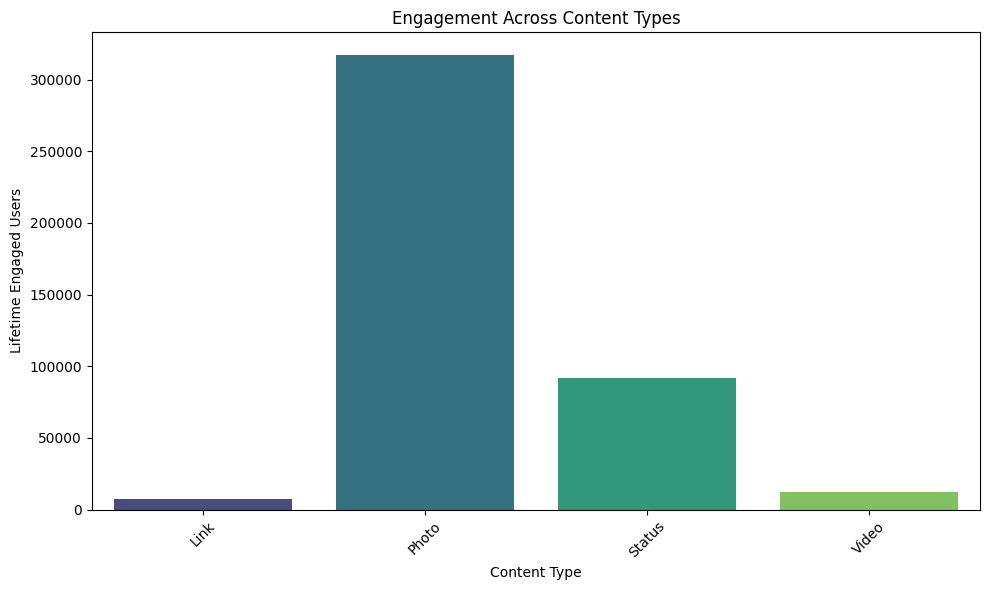

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data by content type
engagement_by_type = df.groupby('Type').agg({'Lifetime Engaged Users': 'sum'})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_by_type.index, y=engagement_by_type['Lifetime Engaged Users'], palette='viridis')
plt.title('Engagement Across Content Types')
plt.xlabel('Content Type')
plt.ylabel('Lifetime Engaged Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-40-8960059449f0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reach_by_paid.index, y=reach_by_paid['Lifetime Post Total Reach'], palette='coolwarm')


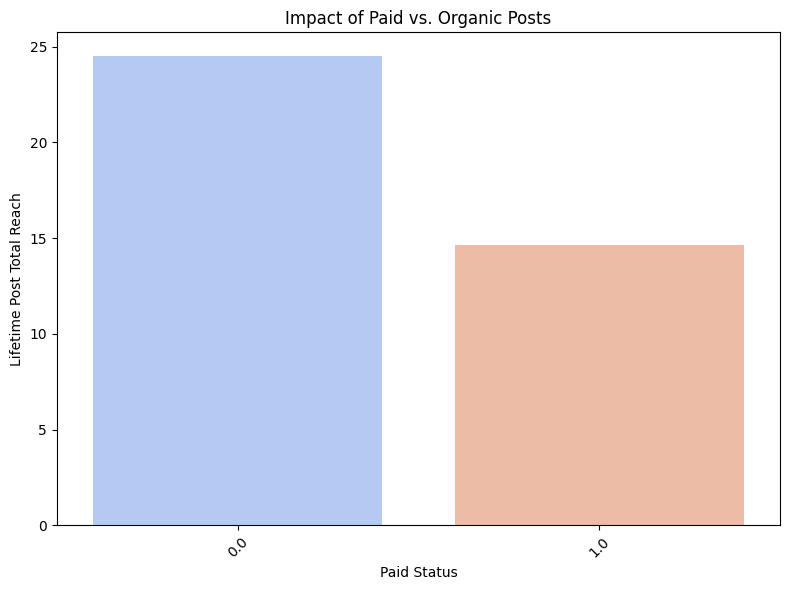

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data by paid status
reach_by_paid = df.groupby('Paid').agg({'Lifetime Post Total Reach': 'sum'})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=reach_by_paid.index, y=reach_by_paid['Lifetime Post Total Reach'], palette='coolwarm')
plt.title('Impact of Paid vs. Organic Posts')
plt.xlabel('Paid Status')
plt.ylabel('Lifetime Post Total Reach')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


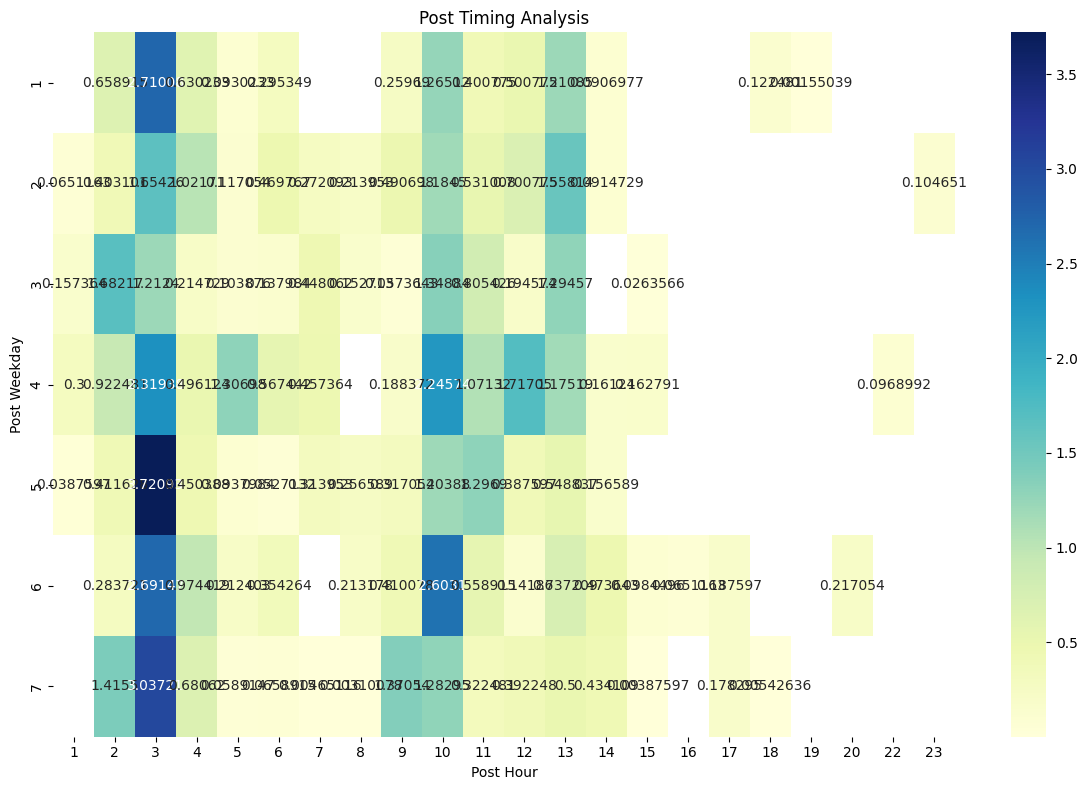

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data for heatmap
heatmap_data = df.pivot_table(index='Post Weekday', columns='Post Hour', values='Total Interactions', aggfunc='sum')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Post Timing Analysis')
plt.xlabel('Post Hour')
plt.ylabel('Post Weekday')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('cleaned_data.csv')

# Summary statistics
print(df.describe(include='all'))


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


        Unnamed: 0  Page total likes   Type    Category  Post Month  \
count   487.000000        487.000000    487  487.000000         0.0   
unique         NaN               NaN      4         NaN         NaN   
top            NaN               NaN  Photo         NaN         NaN   
freq           NaN               NaN    413         NaN         NaN   
mean    249.907598     123168.685832    NaN    1.878850         NaN   
std     144.369003      16224.930859    NaN    0.853282         NaN   
min       0.000000      81370.000000    NaN    1.000000         NaN   
25%     126.500000     112324.000000    NaN    1.000000         NaN   
50%     251.000000     129600.000000    NaN    2.000000         NaN   
75%     374.500000     136393.000000    NaN    3.000000         NaN   
max     498.000000     139441.000000    NaN    3.000000         NaN   

        Post Weekday   Post Hour        Paid  Lifetime Post Total Reach  \
count     487.000000  487.000000  487.000000                 487.000000 

In [ ]:
# Data types
print(df.dtypes)

# Missing values
print(df.isnull().sum())


Unnamed: 0                                                               int64
Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                             float64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                              float64
Lifetime Post Total Impressions                                        float64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                          

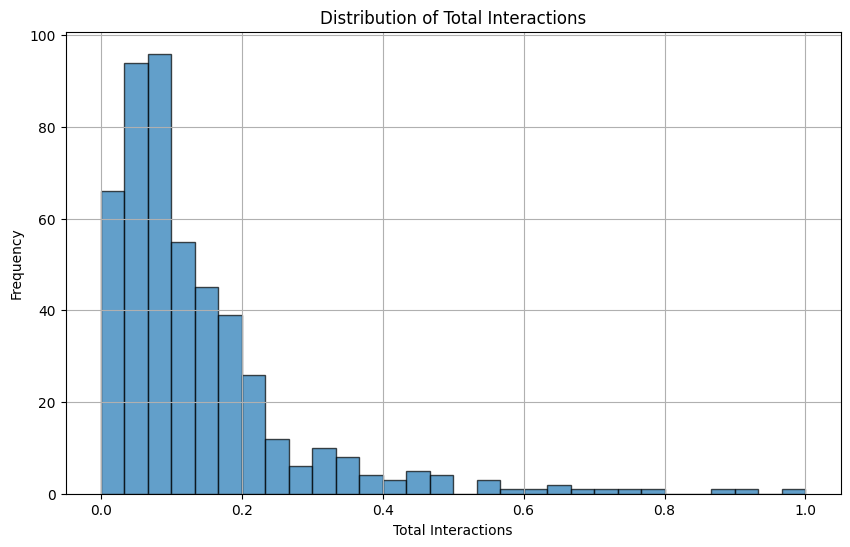

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Total Interactions'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Interactions')
plt.xlabel('Total Interactions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-47-baeb985ce646>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='engagement_rate', data=df, palette='pastel')


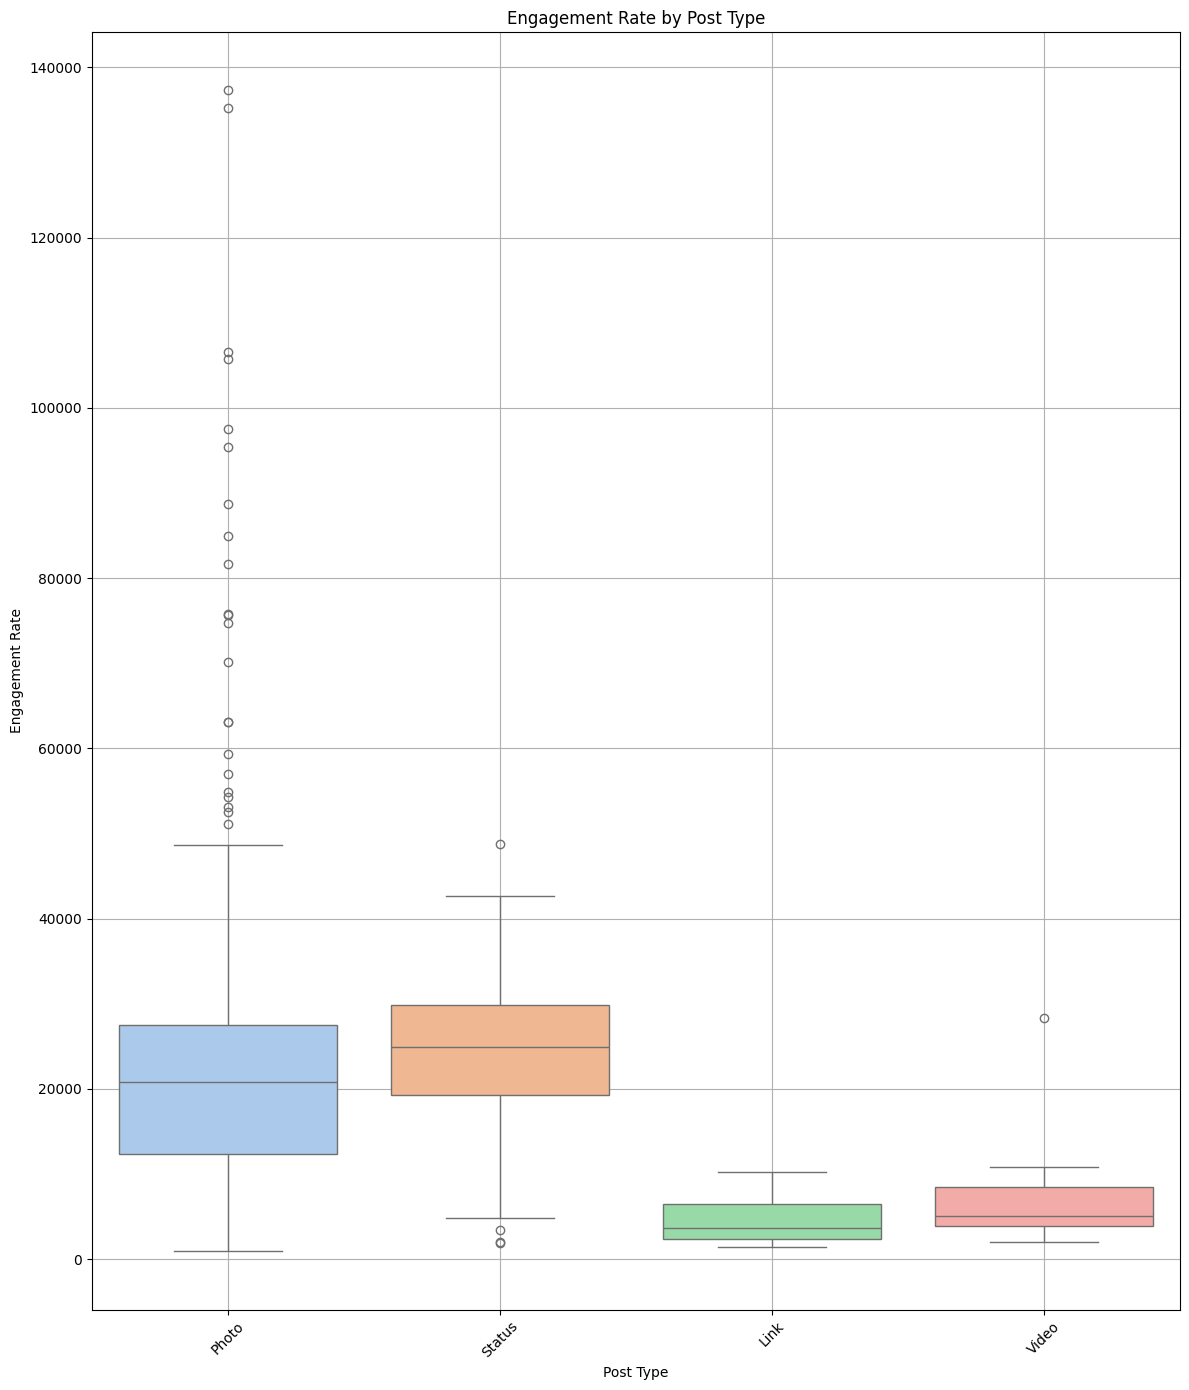

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 14))
sns.boxplot(x='Type', y='engagement_rate', data=df, palette='pastel')
plt.title('Engagement Rate by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


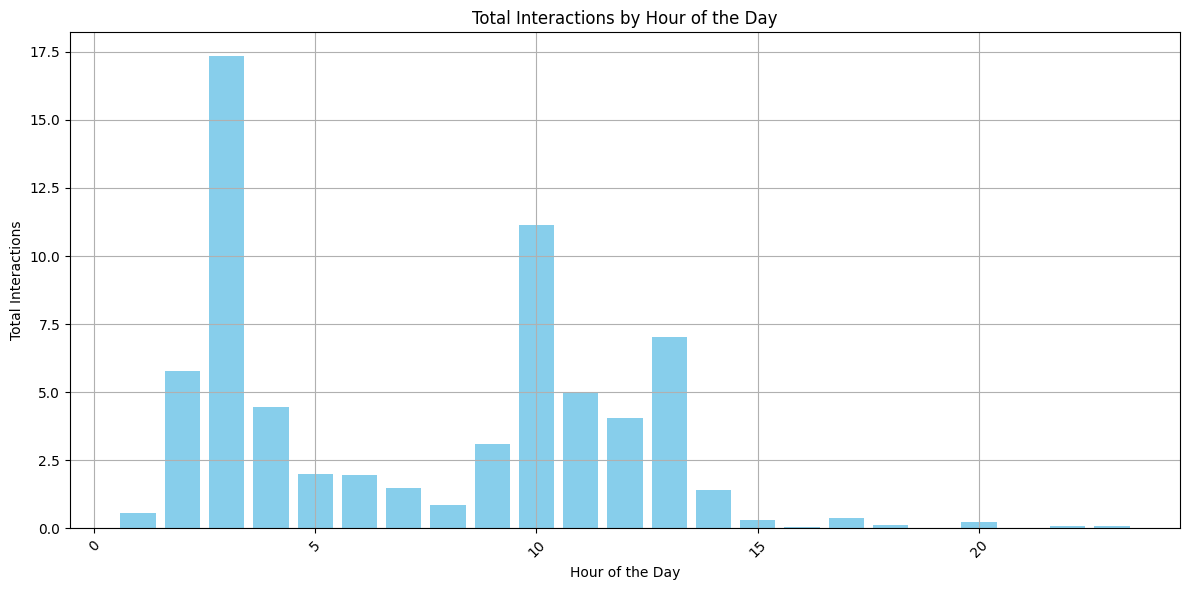

In [ ]:
# Aggregate total interactions by post hour
engagement_by_hour = df.groupby('Post Hour').agg({'Total Interactions': 'sum'})

# Plot
plt.figure(figsize=(12, 6))
plt.bar(engagement_by_hour.index, engagement_by_hour['Total Interactions'], color='skyblue')
plt.title('Total Interactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-50-19c877e30fc3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_by_category.index, y=performance_by_category['Total Interactions'], palette='viridis')


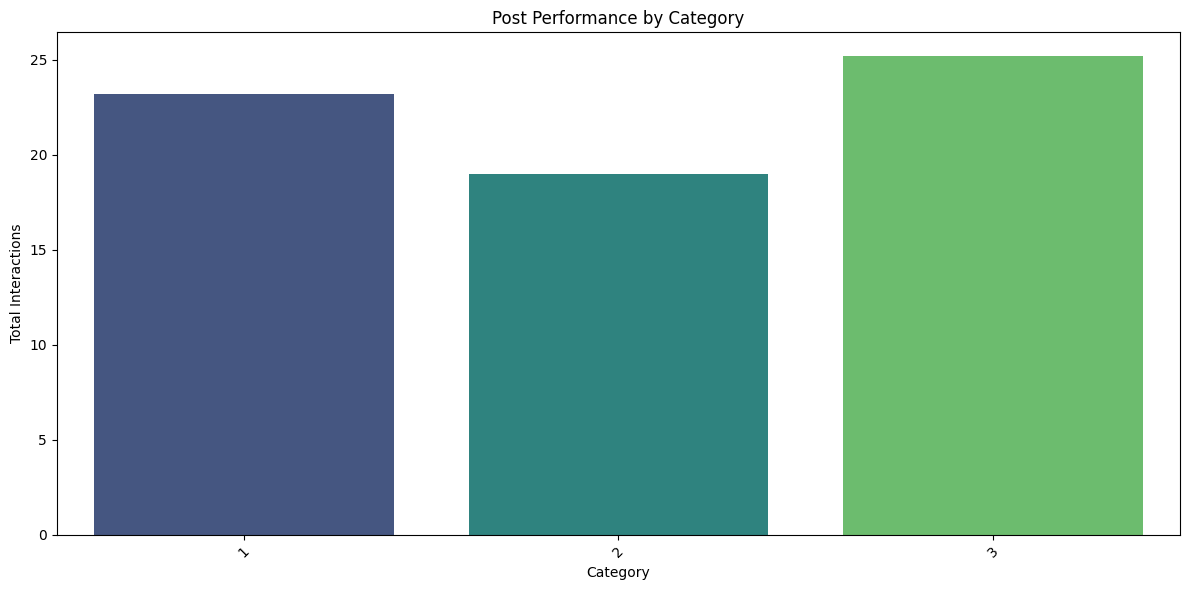

In [ ]:
# Aggregate total interactions by category
performance_by_category = df.groupby('Category').agg({'Total Interactions': 'sum'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_by_category.index, y=performance_by_category['Total Interactions'], palette='viridis')
plt.title('Post Performance by Category')
plt.xlabel('Category')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-51-26c51b594b06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_by_paid_status.index, y=performance_by_paid_status['Total Interactions'], palette='coolwarm')


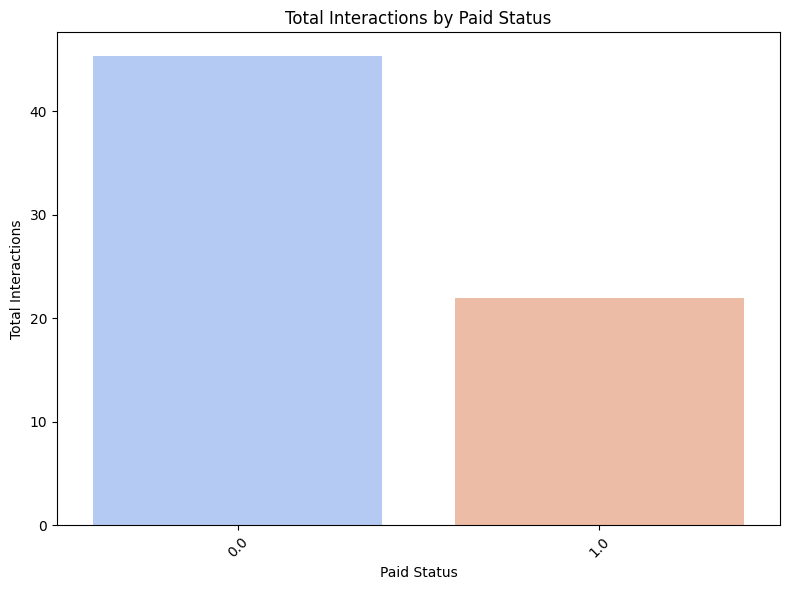

In [ ]:
# Aggregate total interactions by paid status
performance_by_paid_status = df.groupby('Paid').agg({'Total Interactions': 'sum'})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=performance_by_paid_status.index, y=performance_by_paid_status['Total Interactions'], palette='coolwarm')
plt.title('Total Interactions by Paid Status')
plt.xlabel('Paid Status')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
